In [1]:
#importind required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#importing classes to handle data,to split data into training and testing sets,to visualising of tree and to cheak accuracy of our model
from preprocessing import splitter
from preprocessing import Encoder
from preprocessing import scaler
from metrics import matrix
from treeVis import vis
sp=splitter()
mt=matrix()
vs=vis()
sc=scaler()
en=Encoder()

/home/sohel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#importing dataset
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


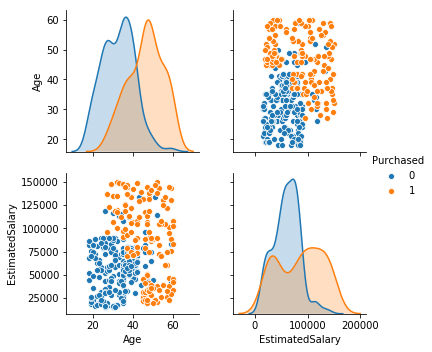

In [4]:
sb.pairplot(dataset,hue='Purchased',vars=['Age','EstimatedSalary'])
plt.show()

In [5]:
#deviding data into dependant and independant sets
x=dataset.iloc[:,1:4].values
y=dataset.iloc[:,-1]


In [6]:
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# le=LabelEncoder()
# x[:,0]=le.fit_transform(x[:,0])
# ohe=OneHotEncoder(categorical_features = [0])
# x=ohe.fit_transform(x).toarray()
# x.astype(int)
# cf=0
x[:,0]=en.labelEncoding(x[:,0])
x=en.one_hot_encoder(x,0)
x.astype(int)
x.astype(int)

array([[    0,     1,    19, 19000],
       [    0,     1,    35, 20000],
       [    1,     0,    26, 43000],
       ...,
       [    1,     0,    50, 20000],
       [    0,     1,    36, 33000],
       [    1,     0,    49, 36000]])

In [7]:
#avoiding dummy variable trap by removing 1st colomn
x=x[:,1:]
print(x.astype(int))

[[    1    19 19000]
 [    1    35 20000]
 [    0    26 43000]
 ...
 [    0    50 20000]
 [    1    36 33000]
 [    0    49 36000]]


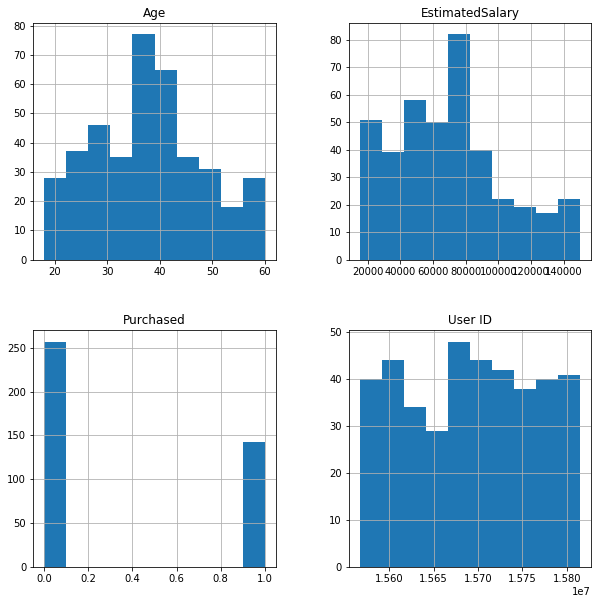

In [8]:
#visualising each attribute of dataset using histogram
dataset.hist(figsize = (10, 10))
plt.show()

In [9]:
#deviding data into training and testing sets
x_train,x_test,y_train,y_test=sp.decomposition(x,y)

In [10]:
#importing decision tree model and fitting training data to it
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [11]:
#predicting values for x_test and compairing result with y_test
y_pred=classifier.predict(x_test)
print("predicted values:-")
print(y_pred.astype(int))
y_test_arr=np.array(y_test)
print("original values:-")
print(y_test_arr)

predicted values:-
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]
original values:-
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [12]:
#cheaking accuracy of our model
accuracy=mt.accuracy(y_pred,y_test)
print("{}%".format(accuracy*100))

100.0%


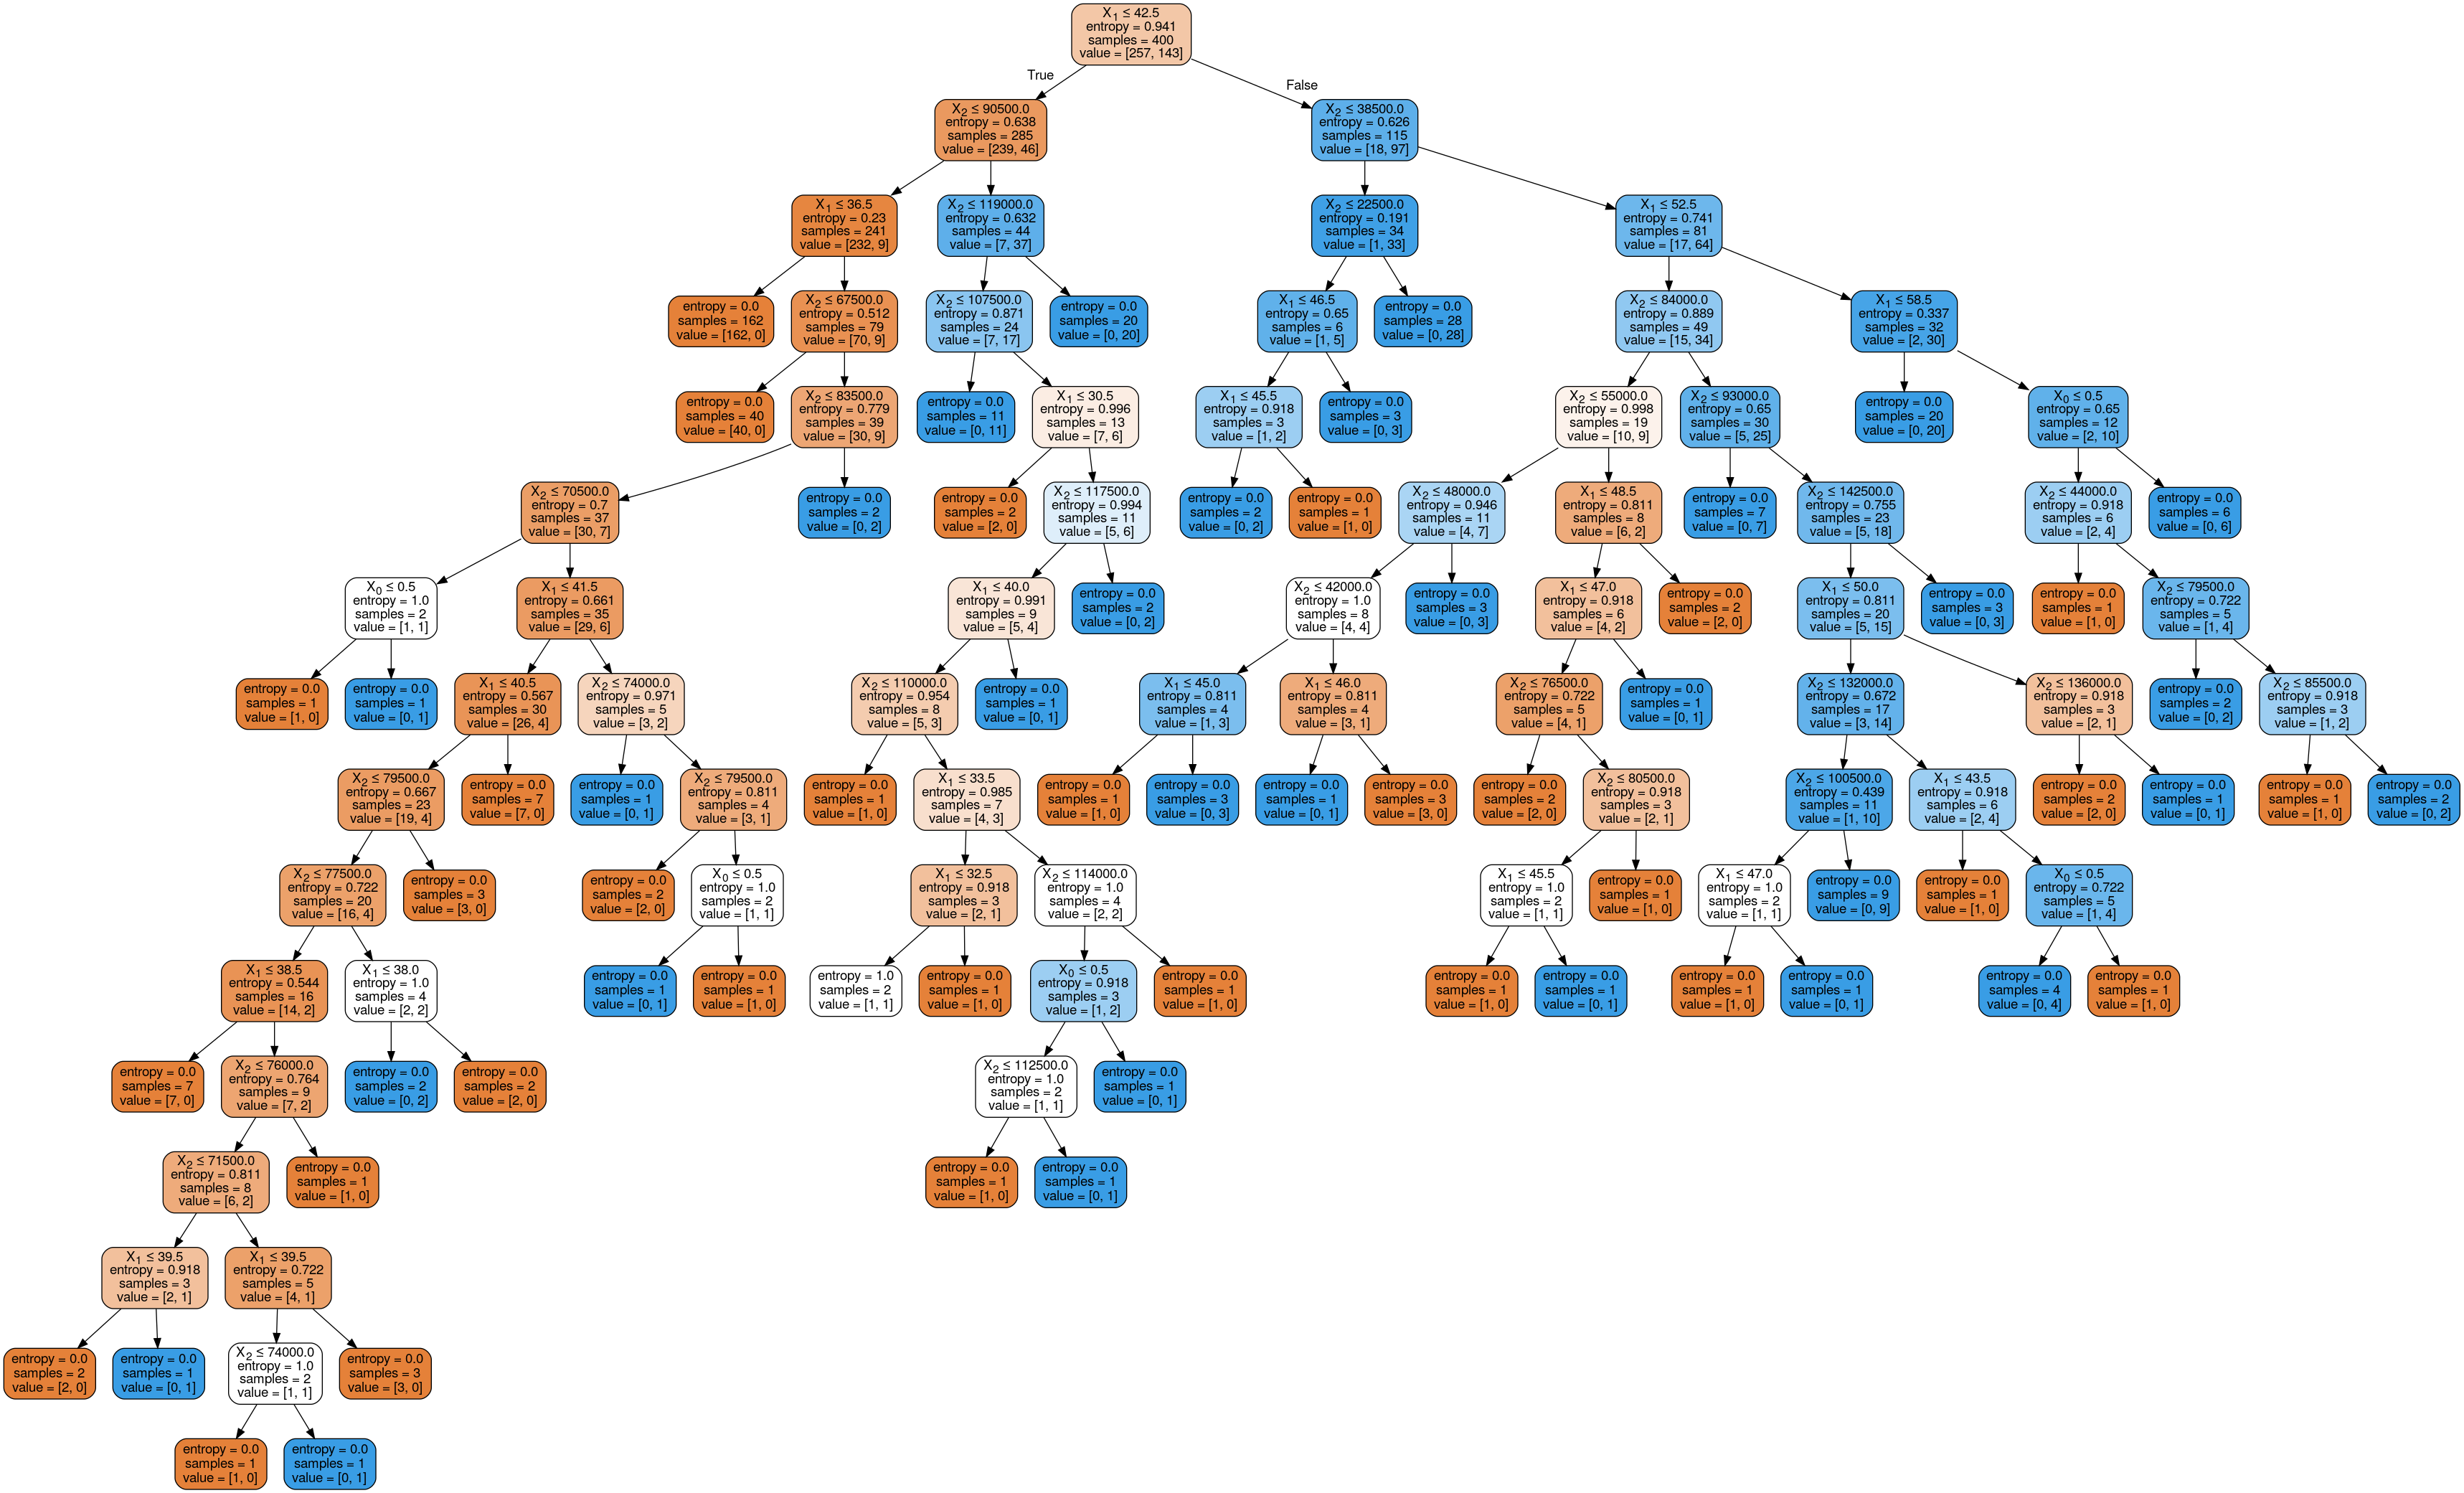

In [13]:
#tree visualisation

vs.dtree_visual(classifier)